# Objectives
### Hello Kaggler!, <span style="color:PURPLE">Objective of this short kernal is to</span> <span style="color:red">Interprete a Random Forest Model with Shapely Values method.</span>

To make this very easy to grasp I have used infamouse Titanic data set to train the ML model.

### Additionally, after reading this Kernel I hope that you would 
* Get an understanding How to use SHAP library for calculating Shapley values for a random forest classifier.
* Get an understanding on how the model makes predictions using shapely values method.


The intent here is not to build the best possible model but rather the focus is on the aspect of interpretability.

# Using SHAP library for calculating Shapley values for a Random Forest Classifier

## Dataset

Using a watersheds data set from Dr Pan's Env Analysis class

In [18]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [45]:
rawdata = pd.read_csv("watersheds.csv")
data = pd.read_csv("watersheds.csv")
#remove Geology column and store it in the target variable
geology = data.pop("Geology")
#data = data.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(data, geology,test_size=0.3,random_state=0)
#geology
#data

In [5]:
X_train.head

<bound method NDFrame.head of       %LOGGED  %BROADLEAF     %MIXED   %CONIFER  %Broadleaf+mixed  Turbidity  \
22  20.430202   16.422200  22.091179  50.624381         38.513380       0.50   
5   11.012742    0.573937   7.056043  90.124916          7.629980       0.50   
16   0.187534    0.258598   7.382984  91.763641          7.641583       8.50   
8   18.571639    4.609816  26.445225  61.237091         31.055041       0.80   
14  53.992693    5.905642  14.351699  50.379413         20.257341       0.70   
23  25.345822    7.115689  13.248811  73.185420         20.364501       1.60   
20  13.762312    6.376518  10.111336  81.184211         16.487854       0.70   
1    0.000000    5.228540  21.984392  72.474916         27.212932       0.50   
29  52.962508    5.913359  12.831494  63.498600         18.744853      12.90   
6   13.447013   14.016173  28.671259  56.084656         42.687431       0.10   
4    8.752438    1.861958   9.245586  87.207063         11.107544       0.10   
18   5.527

## Data Preparation
let's get the datasets ready to put into training. Since our goal is not to make a better classiefier for the problem, let's train a simple model.



## Model Training

Let's train the RF model and get the accuracy measure.

In [8]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.3333333333333333


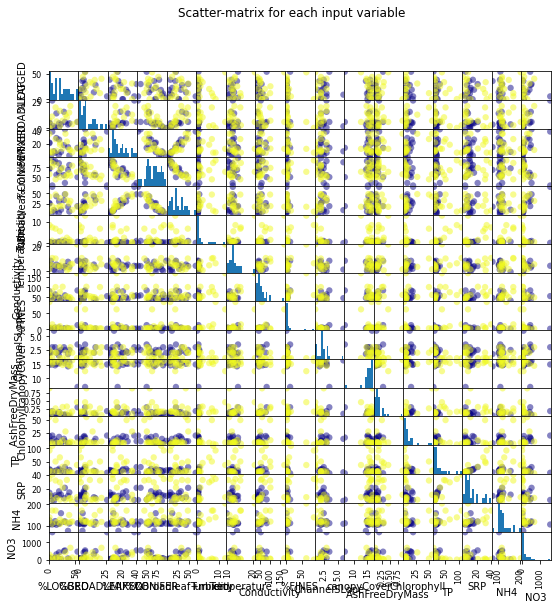

In [43]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
cmap = cm.get_cmap('plasma')
geology2 = geology.replace("basalt", 0)
geology2 = geology2.replace("shale", 1)
scatter = pd.plotting.scatter_matrix(rawdata, c=geology2, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('watersheds_scatter_matrix')
#geology2

## Interpreting the Model With Shapely Values

### 1. Import SHAP package

In [32]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


### 2. Create the Explainer

In [34]:
import shap
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(random_forest)

### 3. Use the explainer to explain predictions


#### Calculate Shap values example 1 

In [47]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
X_test.loc[[2]]
X_test

,%LOGGED,%BROADLEAF,%MIXED,%CONIFER,%Broadleaf+mixed,Turbidity,Temperature,Conductivity,%FINES,ChannelSLope,canopyCover,AshFreeDryMass,Chlorophyll,TP,SRP,NH4,NO3
2,2.758390,0.278552,1.362913,97.512933,1.641464,0.4,14.2,46.5,1.250,2.0,15.833333,0.111957,8.814829,18.079705,9.856766,109.213822,28.615417
28,43.749053,3.817439,7.733484,78.658966,11.550923,0.7,13.0,38.5,4.000,2.0,16.666667,0.158883,5.671613,9.371982,1.119645,118.733633,126.923693
13,38.224354,4.623578,3.074316,80.392157,7.697894,0.5,11.7,38.9,1.000,2.5,16.000000,0.024392,4.011639,19.984520,14.821040,109.213822,23.810248
10,27.883541,15.485842,18.282223,55.363647,33.768065,0.5,11.5,39.0,3.200,3.0,15.833333,0.054924,12.917795,14.270076,6.679631,117.198180,494.651919
26,37.955840,14.748317,11.830715,60.323822,26.579032,1.7,10.9,50.6,3.125,2.0,14.833333,0.124059,4.954663,13.725844,6.083918,149.749794,49.228469
24,30.824717,12.803557,34.910501,50.906396,47.714058,0.5,11.8,52.1,3.200,2.0,15.333333,0.088873,27.337543,14.814309,4.495351,118.119452,420.587328
27,40.224918,20.986891,11.254019,53.858521,32.240910,0.6,12.8,49.6,2.875,3.0,14.666667,0.046100,7.528359,7.739284,7.076773,117.198180,681.012913
11,29.782776,5.943743,41.367657,35.811550,47.311400,1.1,12.1,60.1,2.900,2.5,16.500000,0.058946,8.171412,30.869174,21.373881,119.347815,534.584825
17,4.999859,10.996348,9.410537,75.712050,20.406886,1.2,12.4,44.1,6.300,2.0,16.000000,0.115777,5.917768,13.997960,4.495351,108.292550,164.762989


Choosen instance refers to an **Unlucky (not survived) Male passenger of age 21 travelling in passenger class 3, embarked from Q.** Let's see what and how our model predicts his survival.

In [41]:
# Calculate Shap values
choosen_instance = X_test.loc[[28]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :
What you see above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

Model predicted 0.16 (Not survived), whereas the base_value is 0.3793. Biggest effect is person being a male; This has decreased his chances of survival significantly. Next, passenger class 3 also decreases his chances of survival while being 21 and port of embarkation beign S increases his chances of survival.

---
#### Calculate Shap values example 2

In [10]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
test.loc[[310]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
310,1,1,female,24.0,0,0,83.1583,C


Choosen instance refers to an **Survived female passenger of age 24 travelling in passenger class 1, embarked from C.** Let's see what and how our model predicts her survival.

In [11]:
# Calculate Shap values
choosen_instance = X_test.loc[[310]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :

Model predicted 1 (Fully confident that passenger survives), whereas the base_value is 0.3793. Biggest effect is person being a female; This has increased her chances of survival significantly. Next, passenger class 1 also increases her chances of survival.

Choosen instance refers to an **Unlucky(Not Survived) female passenger of age 48 travelling in passenger class 3, embarked from S.** Let's see what and how our model predicts her survival.

In [13]:
# Calculate Shap values
choosen_instance = X_test.loc[[736]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :

Model predicted 0.42, whereas the base_value is 0.3793. Biggest effect is person being a female; This has increased her chances of survival significantly. Fare value of 34.38 has also played a part incresing her chances. However, beign a passenger in class 3 and her age (48) has significantly decreased her chances of survival.

---
#### Calculate Shap values example 4

In [14]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
test.loc[[788]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
788,1,3,male,1.0,1,2,20.575,S


Choosen instance refers to an **Survived male passenger of age 1 travelling in passenger class 3, embarked from S.** Let's see what and how our model predicts his survival.

In [15]:
# Calculate Shap values
choosen_instance = X_test.loc[[788]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :

Model predicted 0.66, whereas the base_value is 0.3793. Although passenger class 3 and being a male passenger has decresed his chances of survival. Biggest effect has come from his age being 1 years old; This has increased his chances of survival significantly.

---

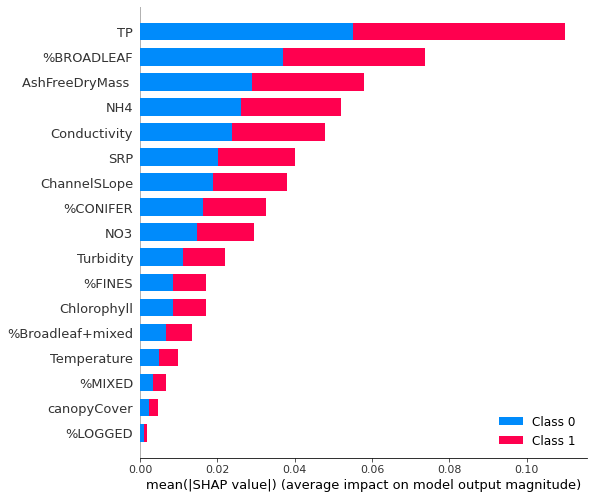

In [42]:
shap.summary_plot(shap_values, X_train)

### Credits

* https://shap.readthedocs.io/en/latest/
* https://christophm.github.io/interpretable-ml-book/intro.html
* https://www.kaggle.com/dansbecker/shap-values#Code-to-Calculate-SHAP-Values

# Thank you!

### **If you like the notebook and think that it helped you..PLEASE UPVOTE. It will keep me motivated** :) :)

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load the iris dataset and get X and Y data
iris = load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 123)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
type(y)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120, 1)
y_test shape: (30, 1)


pandas.core.frame.DataFrame